In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/The Dark Knight 2008.csv
/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv
/kaggle/input/movie-review/The Lord of the Rings The Fellowship of the Ring 2001.csv
/kaggle/input/movie-review/Man of Steel 2013.csv
/kaggle/input/movie-review/Interstellar 2014.csv
/kaggle/input/movie-review/Joker 2019.csv
/kaggle/input/movie-review/Star Wars Episode VII - The Force Awakens 2015.csv
/kaggle/input/movie-review/Prometheus 2012.csv


## Putting all things together

In [2]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split


%matplotlib inline
def setup_data(df):
    '''
    Preprocess some basic works
    '''
    # Drop every column except the specified column
    df = df[['rating', 'review']]
    # Drop Null rows
    df = df[~(df == 'Null').any(axis=1)]
    
    
    return df

def remove_big_review(rev):
    '''
    Removes big review greter than length
    '''
    if len(rev)>3000:
        rev = 'Null'
    return rev

def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
    test = test.replace('.', '')
    test = test.replace(',', '')
    test = test.replace('?', '')
    test = test.replace('!', '')
    test = test.replace('\n', '')
    test = test.lower()
    return test

def stop_words(doc):
    '''
    Removes Words that are not that necessary for our model.
    '''
    # Process the document
    doc = nlp(doc)

    # List of stop words in spaCy
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Filter out stop words from the document
    filtered_words = [token.text for token in doc if not token.is_stop]

    # Join the filtered words back into a string
    filtered_document = " ".join(filtered_words)
    
    return filtered_document

import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_lg")


# Function to convert text to vectors using spaCy
def text_to_vectors(text):
    '''
    Converts text to vector
    '''
    doc = nlp(text)
    return doc.vector


def level(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 0
    elif x in [7, 8]:
        x = 1
    elif x in [5, 6]:
        x = 2
    elif x in [1, 2, 3, 4]:
        x = 3
    return x

def level2(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x > 5:
        x = 0
    else:
        x = 1
    return x

def plot_rate(df):
    df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
df = pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')
df.head()

,username,rating,helpful,total,date,title,review
0,JF500,10,7092,8206,10 September 2019,As a viewer that actually went to TIFF and wi...,I was a person that saw all the hype and claim...
1,MihaVrhunc,10,3512,4261,3 October 2019,Outstanding movie with a haunting performance...,"Every once in a while a movie comes, that trul..."
2,lesterarnoldpinto,10,2905,3641,7 October 2019,Only certain people can relate\n,This is a movie that only those who have felt ...
3,Aman_Goyal,10,3263,4108,1 September 2019,Perfect in every aspect.\n,"Truly a masterpiece, The Best Hollywood film o..."
4,logical_guy,10,2827,3573,1 September 2019,MASTERPIECE 😍\n,Joaquin Phoenix gives a tour de force performa...


In [5]:
df.review = df.review.apply(remove_big_review)
df = setup_data(df)
df.shape
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)
df.rating = df.rating.astype(int)
df.rating = df.rating.apply(level2)

In [6]:
df.head()

,rating,review
0,0,i was a person that saw all the hype and claim...
1,0,every once in a while a movie comes that truly...
2,0,this is a movie that only those who have felt ...
3,0,truly a masterpiece the best hollywood film of...
4,0,joaquin phoenix gives a tour de force performa...


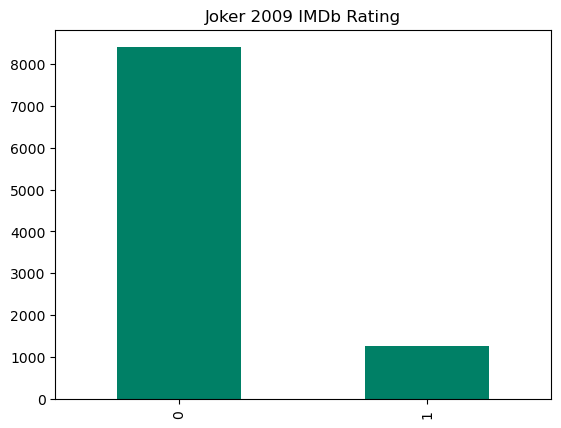

In [7]:
plot_rate(df)

# Create Model Sentiment

In [7]:
import tensorflow as tf
import sklearn
from tqdm import tqdm
# Loading the BERT Classifier and Tokenizer along with Input module
from IPython.display import clear_output
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

modelS = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
len(df),df.shape

(9655, (9655, 2))

In [9]:
train = df[:int(len(df)*.8)]
valid = df[int(len(df)*.8):int(len(df)*.9)]
test = df[int(len(df)*.9):]

In [10]:
train.shape, valid.shape, test.shape

((7724, 2), (965, 2), (966, 2))

In [11]:
def convert_data_to_examples(train, test, review, sentiment): 
    '''
    — convert_data_to_examples: 
    This will accept our train and test datasets and convert each row into an InputExample object.
    '''
    train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[review], 
                                                          label = x[sentiment]), axis = 1)

    validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[review], 
                                                          label = x[sentiment]), axis = 1,)
  
    return train_InputExamples, validation_InputExamples

train_InputExamples, validation_InputExamples = convert_data_to_examples(train,  valid, 'review',  'rating')
                         

In [13]:
train_InputExamples[0]

InputExample(guid=None, text_a='i was a person that saw all the hype and claims of masterpiece as overreacting and overblown excitement for another joker based film i thought this looked solid at best and even a bit too pretentious in the trailer but in here to say i was incredibly wrong this is a massive achievement of cinema thats extremely rare in a day and age of cgi nonsense and reboots while this is somewhat of a reboot of sorts the standalone origin tale is impeccable from start to finish and echoes resemblance to the best joker origin comics from the past joaquin bleeds sweats and cries his every drop into this magnificently dedicated performance heath ledger would be proud this is undoubtedly the greatest acting performance since heaths joker the directing and writing is slickly brilliant and the bleak settings and tones are palpable throughout when this film was over the place was blown away and every audience member was awestruck that they witnessed a film that could still t

In [14]:
len(train_InputExamples), len(validation_InputExamples)

(7724, 965)

In [12]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    '''
    — convert_examples_to_tf_dataset: 
    This function will tokenize the InputExample objects, 
    then create the required input format with the tokenized objects, 
    finally, create an input dataset that we can feed to the model.
    '''
    features = [] # -> will hold InputFeatures to be converted later

    for e in tqdm(examples):
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,    # Add 'CLS' and 'SEP'
            max_length=max_length,    # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],input_dict["token_type_ids"], input_dict['attention_mask'])
        features.append(InputFeatures( input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label) )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'review'
LABEL_COLUMN = 'rating'

In [13]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

  0%|          | 0/7724 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 7724/7724 [00:34<00:00, 222.43it/s]


In [14]:
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

100%|██████████| 965/965 [00:03<00:00, 272.08it/s]


In [15]:
modelS.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

modelS.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
484/484 [==============================] - 485s 869ms/step - loss: 0.2748 - accuracy: 0.8920 - val_loss: 0.2761 - val_accuracy: 0.9005
Epoch 2/2
484/484 [==============================] - 410s 848ms/step - loss: 0.0773 - accuracy: 0.9716 - val_loss: 0.3527 - val_accuracy: 0.9057


## Evaluate model

In [16]:
print('is gpu available')

is gpu available


In [18]:
test[:5]

,rating,review
9036,1,the making is just bad and pretty boring not s...
9037,1,dont get me wrong joaquins performance is bril...
9038,0,joaquin phoenixs performance was exceptional a...
9039,0,its funny how some think this was a masterpiec...
9040,0,lets diecuss whats not being discussed the fac...


In [19]:
pred_sent = []
for sent in test.review:
    pred_sent.append(sent)
pred_sent[0]

'the making is just bad and pretty boring not sure in what dimension ppl think to like it if you are capable to tolerate such a movie and still appreciate it (i would say you are blessed with a strong mind)  well first go back home to tolerate and understand your loved ones heart on this will improve our life and relationships for good'

In [20]:
tf_batch = tokenizer(pred_sent, max_length=128, padding=True, truncation=True, return_tensors='tf')   # we are tokenizing before sending into our trained model
tf_outputs = modelS(tf_batch)                                  
# tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)       # axis=-1, this means that the index that will be returned by argmax will be taken from the *last* axis.
# labels = ['Negative','Positive']
# label = tf.argmax(tf_predictions, axis=1)
# label = label.numpy()
# for i in range(len(pred_sentences)):
#     print(pred_sentences[i], ": ", labels[label[i]])

## Save the model

In [69]:
import joblib

# Assuming you have a trained model named 'model'
# Save the model using joblib
joblib.dump(modelS, '/kaggle/working/ModelS.joblib')

/opt/conda/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


['/kaggle/working/ModelS.joblib']

In [32]:
# tf_outputs

In [21]:
tf_predictions = tf.nn.softmax(tf_outputs[0], axis = -1)
preds = tf.argmax(tf_predictions, axis=1)
preds = preds.numpy()

In [22]:
preds[:100]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [23]:
y_test = np.array(test.rating)
y_test[:100]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [24]:

from sklearn.metrics import accuracy_score


# Calculate accuracy score
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 92.75%


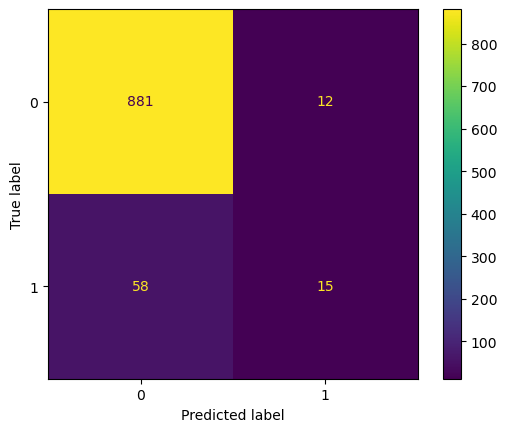

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

con_mat = confusion_matrix(y_test, preds)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

# Now Prepare model P

In [26]:
pdf = pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')

In [28]:
pdf.head(2)

,username,rating,helpful,total,date,title,review
0,JF500,10,7092,8206,10 September 2019,As a viewer that actually went to TIFF and wi...,I was a person that saw all the hype and claim...
1,MihaVrhunc,10,3512,4261,3 October 2019,Outstanding movie with a haunting performance...,"Every once in a while a movie comes, that trul..."


In [29]:
pdf.review = pdf.review.apply(remove_big_review)
pdf = setup_data(pdf)
pdf.shape
# Clean the text removing unnecessary things
pdf['review'] = pdf['review'].apply(clean_text)
pdf.rating = pdf.rating.astype(int)
pdf.rating = pdf.rating.apply(level)

In [30]:
pdf.head()

,rating,review
0,0,i was a person that saw all the hype and claim...
1,0,every once in a while a movie comes that truly...
2,0,this is a movie that only those who have felt ...
3,0,truly a masterpiece the best hollywood film of...
4,0,joaquin phoenix gives a tour de force performa...


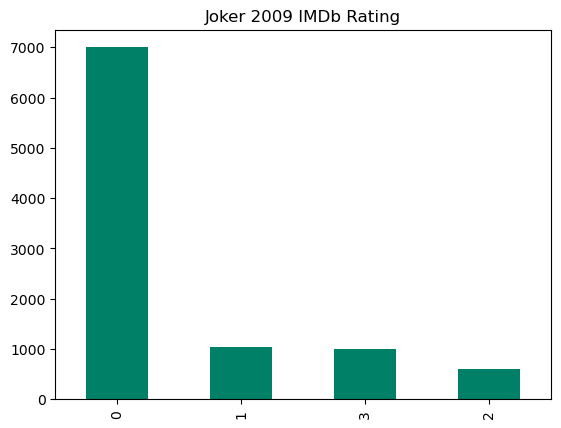

In [32]:
plot_rate(pdf)

In [33]:
# Clean the text removing unnecessary things
# df['review'] = df['review'].apply(clean_text)
pdf['review'] = pdf['review'].apply(stop_words)

# Convert to vector
pdf['vector'] = pdf['review'].apply(text_to_vectors)

In [34]:
df.head()

,rating,review
0,0,i was a person that saw all the hype and claim...
1,0,every once in a while a movie comes that truly...
2,0,this is a movie that only those who have felt ...
3,0,truly a masterpiece the best hollywood film of...
4,0,joaquin phoenix gives a tour de force performa...


In [35]:
train = pdf[:int(len(pdf)*.8)]
valid = pdf[int(len(pdf)*.8):int(len(pdf)*.9)]
test = pdf[int(len(pdf)*.9):]

In [36]:
test.head()

,rating,review,vector
9036,2,making bad pretty boring sure dimension ppl th...,"[-0.93724555, -0.59623396, -1.5733125, -0.9832..."
9037,2,nt wrong joaquins performance brilliant s ends...,"[-0.08817429, 1.0892249, -2.0996995, -0.691899..."
9038,1,joaquin phoenixs performance exceptional deser...,"[-1.6117958, -0.64801663, -2.2417538, -1.34752..."
9039,1,funny think masterpiece good far masterpieceyo...,"[-0.77681273, 0.22818139, -1.4298422, -0.04770..."
9040,1,lets diecuss s discussed fact joker fitting de...,"[-0.58789915, 0.47238693, -0.780967, -0.375988..."


In [37]:
x_train = list(train['vector'])
y_train = list(train.rating.astype(int))
x_val = list(valid['vector'])
y_val = list(valid.rating.astype(int))
 

In [38]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
logreg.score(x_val, y_val)

0.6704663212435233

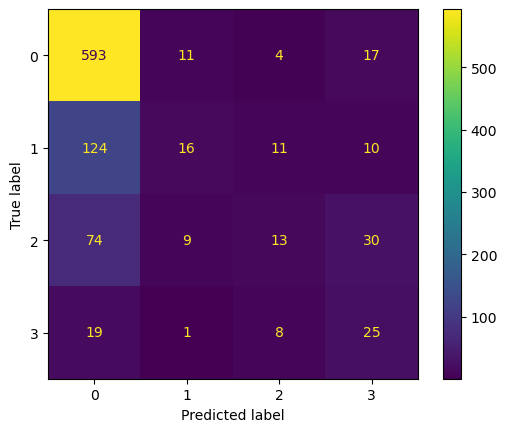

In [40]:
# Make predictions
preds = logreg.predict(x_val)
con_mat = confusion_matrix(y_val, preds)
con_mat
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1, 2, 3])
con_mat_plot.plot()
plt.show()

In [70]:
# Save the model using joblib
joblib.dump(logreg, '/kaggle/working/ModelP.joblib')

['/kaggle/working/ModelP.joblib']

## Create the Algorithm

In [41]:
sdf = df

In [42]:
sdf.head(3)

,rating,review
0,0,i was a person that saw all the hype and claim...
1,0,every once in a while a movie comes that truly...
2,0,this is a movie that only those who have felt ...


In [43]:
pdf.head(3)

,rating,review,vector
0,0,person saw hype claims masterpiece overreactin...,"[-0.31473646, 0.20912966, -0.86060315, -1.2628..."
1,0,movie comes truly makes impact joaquins perfor...,"[-0.036105927, 1.4407943, -1.3615227, 0.157856..."
2,0,movie felt isolated truly relate understand mo...,"[-0.91238123, 0.750262, -2.4282863, -2.7551541..."


In [45]:
stest = sdf[int(len(pdf)*.9):]
ptest = pdf[int(len(pdf)*.9):]

In [46]:
stest.head(3)

,rating,review
9036,1,the making is just bad and pretty boring not s...
9037,1,dont get me wrong joaquins performance is bril...
9038,0,joaquin phoenixs performance was exceptional a...


In [47]:
ptest.head(3)

,rating,review,vector
9036,2,making bad pretty boring sure dimension ppl th...,"[-0.93724555, -0.59623396, -1.5733125, -0.9832..."
9037,2,nt wrong joaquins performance brilliant s ends...,"[-0.08817429, 1.0892249, -2.0996995, -0.691899..."
9038,1,joaquin phoenixs performance exceptional deser...,"[-1.6117958, -0.64801663, -2.2417538, -1.34752..."


In [48]:
pred_sent = []
for sent in stest.review:
    pred_sent.append(sent)
pred_sent[0]

'the making is just bad and pretty boring not sure in what dimension ppl think to like it if you are capable to tolerate such a movie and still appreciate it (i would say you are blessed with a strong mind)  well first go back home to tolerate and understand your loved ones heart on this will improve our life and relationships for good'

In [49]:
x_testp = list(ptest['vector'])
y_testp = list(ptest.rating.astype(int))

In [50]:
y_testp[:3]

[2, 2, 1]

In [51]:
true = y_testp

In [52]:
tf_batch = tokenizer(pred_sent, max_length=128, padding=True, truncation=True, return_tensors='tf')   # we are tokenizing before sending into our trained model
tf_outputs = modelS(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis = -1)
preds = tf.argmax(tf_predictions, axis=1)
preds = preds.numpy()

In [56]:
# preds[:100]

In [55]:
predp = logreg.predict(x_testp)

In [64]:
np.array(true[:100])

array([2, 2, 1, 1, 1, 3, 0, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3])

In [57]:
preds[:100]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [58]:
predp[:100]

array([0, 3, 0, 0, 2, 3, 0, 3, 1, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3])

In [63]:
ptest.head(1)

,rating,review,vector
9036,2,making bad pretty boring sure dimension ppl th...,"[-0.93724555, -0.59623396, -1.5733125, -0.9832..."


In [65]:
p_prb = logreg.predict_proba(x_testp)

In [88]:
p_prb[:10][1]

array([0.0316005 , 0.06194782, 0.23911078, 0.6673409 ])

In [89]:
p_prb[:10][1][2:]

array([0.23911078, 0.6673409 ])

In [90]:
max_index = np.argmax(p_prb[:10][1][2:])
max_index

1

In [79]:
max(p_prb[:10][0][2:])

0.04672327750752635

In [91]:
def final_prediction(sen_pred, p_prb):
    '''
    This is going to make the final prediction.
    '''
    f_pred = []
    for pred, prb in zip(sen_pred, p_prb):
        if pred == 0:
            max_index = np.argmax(prb[:2])
            f_pred.append(max_index)
        elif pred == 1:
            max_index = np.argmax(prb[2:])
            max_index+=2
            f_pred.append(max_index)
    return f_pred

In [83]:
sen_pred = preds[:10]
p_probablity = p_prb[:10]

In [105]:
len(preds), len(p_prb), len(predp)

(966, 966, 966)

In [75]:
sen_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [76]:
p_probablity

array([[0.64274214, 0.29734304, 0.04672328, 0.01319154],
       [0.0316005 , 0.06194782, 0.23911078, 0.6673409 ],
       [0.94429823, 0.04506622, 0.00725613, 0.00337942],
       [0.90389322, 0.0481681 , 0.02900807, 0.01893061],
       [0.18218396, 0.11455987, 0.56473272, 0.13852346],
       [0.14591624, 0.05895509, 0.2032092 , 0.59191947],
       [0.59873903, 0.36471441, 0.02104861, 0.01549795],
       [0.26114087, 0.09163884, 0.15777839, 0.4894419 ],
       [0.14931107, 0.33987861, 0.31151053, 0.19929979],
       [0.21546631, 0.00974668, 0.03082587, 0.74396113]])

In [102]:
answer = final_prediction(preds, p_prb)
answer[:10]

[0, 3, 0, 0, 0, 0, 0, 3, 1, 3]

In [103]:
true[:10]

[2, 2, 1, 1, 1, 3, 0, 3, 1, 3]

In [104]:
predp[:10]

array([0, 3, 0, 0, 2, 3, 0, 3, 1, 3])

## Finale cOnfusiOn Matrix

In [106]:
def plot_con(true, pred):
    con_mat = confusion_matrix(true, pred)
    con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1, 2, 3])
    con_mat_plot.plot()
    plt.show()

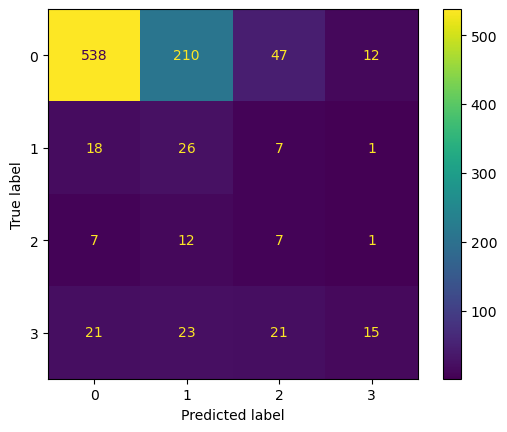

In [108]:
plot_con(predp, true)

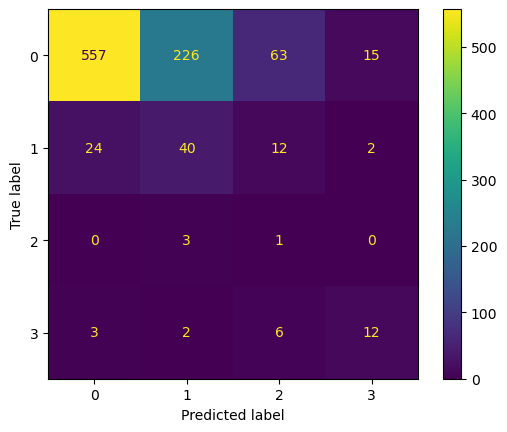

In [109]:
plot_con(answer, true)

## Accuarcy Score

## FInal Accuracy

In [110]:
from sklearn.metrics import accuracy_score


# Calculate accuracy score
accuracy = accuracy_score(answer, true)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 63.15%


## prev accuracy

In [112]:
# Calculate accuracy score
accuracy = accuracy_score(predp, true)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 60.66%
